<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Neuro_Imaging_Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybids
!wget https://s3.amazonaws.com/openneuro/ds000245/ds000245_R1.0.0/compressed/ds000245_R1.0.0.zip -p /content/gdrive/MyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.3 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 1.3 MB 24.6 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.36
    Uninstalling SQLAlchemy-1.4.36:
      Successfully uninstalled SQLAlchemy-1.4.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
--2022-05-31 12:15

In [ ]:
import bids
from bids import BIDSLayout, BIDSValidator
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
data_dir = "/content/gdrive/MyDrive/ds000245_R1.0.0"
layout = BIDSLayout(data_dir,derivatives=True)

/usr/local/lib/python3.7/dist-packages/bids/layout/validation.py:137: UserWarning: Derivative indexing was requested, but no valid derivative datasets were found in the specified locations ([PosixPath('/content/gdrive/MyDrive/ds000245_R1.0.0/derivatives')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a 'dataset_description.json' file in derivatives datasets).
Example contents of 'dataset_description.json':
{"Name": "Example dataset", "BIDSVersion": "1.0.2", "GeneratedBy": [{"Name": "Example pipeline"}]}
  json.dumps(EXAMPLE_DERIVATIVES_DESCRIPTION))


In [ ]:
!pip install -U --user nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 3.7 MB/s 


In [ ]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip "/content/ds000245_R1.0.0.zip"

unzip:  cannot find or open /content/ds000245_R1.0.0.zip, /content/ds000245_R1.0.0.zip.zip or /content/ds000245_R1.0.0.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount("gdrive")

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
layout

BIDS Layout: ...gdrive/MyDrive/ds000245_R1.0.0 | Subjects: 45 | Sessions: 0 | Runs: 0

In [ ]:
layout.get()[:10] #This gets us all the files we need

[<BIDSFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/CHANGES'>,
 <BIDSJSONFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/dataset_description.json'>,
 <BIDSDataFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/participants.tsv'>,
 <BIDSFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/README'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL01/anat/sub-CTL01_T1w.nii.gz'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL01/func/sub-CTL01_task-rest_bold.nii.gz'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL02/anat/sub-CTL02_T1w.nii.gz'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL02/func/sub-CTL02_task-rest_bold.nii.gz'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL03/anat/sub-CTL03_T1w.nii.gz'>,
 <BIDSImageFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/sub-CTL03/func/sub-CTL03_task-rest_bold.nii.gz'>]

We can be a little bit specific and specify the type of data we want to query

In [ ]:
layout.get(target="subject",return_type='id',scope='derivatives')[:10]

[]

In [ ]:
layout.get(target='subject', scope= "raw",suffix='id',return_type='file')[:10]

[]

In [ ]:
f = layout.get()[0]

In [ ]:
f

<BIDSFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/CHANGES'>

In [ ]:
g = layout.get()[1]

In [ ]:
g

<BIDSJSONFile filename='/content/gdrive/MyDrive/ds000245_R1.0.0/dataset_description.json'>

In [ ]:
f.path #Getting the path of the file

'/content/gdrive/MyDrive/ds000245_R1.0.0/CHANGES'

In [ ]:
layout.get_task()

['rest']

We can query all files associated with this task

In [ ]:
layout.get(task='rest')[0].filename #BOLD: Blood Oxyginated Level

'sub-CTL01_task-rest_bold.nii.gz'

In [ ]:
layout.to_df()

entity                                               path datatype extension  \
0        /content/gdrive/MyDrive/ds000245_R1.0.0/T1w.json      NaN     .json   
1       /content/gdrive/MyDrive/ds000245_R1.0.0/datase...      NaN     .json   
2       /content/gdrive/MyDrive/ds000245_R1.0.0/partic...      NaN      .tsv   
3       /content/gdrive/MyDrive/ds000245_R1.0.0/sub-CT...     anat   .nii.gz   
4       /content/gdrive/MyDrive/ds000245_R1.0.0/sub-CT...     func   .nii.gz   
..                                                    ...      ...       ...   
91      /content/gdrive/MyDrive/ds000245_R1.0.0/sub-OD...     anat   .nii.gz   
92      /content/gdrive/MyDrive/ds000245_R1.0.0/sub-OD...     func   .nii.gz   
93      /content/gdrive/MyDrive/ds000245_R1.0.0/task-r...      NaN     .json   
94         /content/gdrive/MyDrive/ds000245_R1.0.0/README      NaN       NaN   
95        /content/gdrive/MyDrive/ds000245_R1.0.0/CHANGES      NaN       NaN   

entity subject        suffix  task  
0          NaN           T1w   NaN  
1          NaN   description   NaN  
2          NaN  participants   NaN  
3        CTL01           T1w   NaN  
4        CTL01          bold  rest  
..         ...           ...   ...  
91       ODP15           T1w   NaN  
92       ODP15          bold  rest  
93         NaN          bold  rest  
94         NaN           NaN   NaN  
95         NaN           NaN   NaN  

[96 rows x 6 columns]

Loading the Data with Nibabel.

In [ ]:
import nibabel as nib
#data = nib.load(layout.get(subject='ODP14',scope='derivatives',suffix='bold', return_type='file', extension='nii.gz')[91])
data = nib.load(layout.get()[92])

In [ ]:
data?

In [ ]:
data.shape

(192, 256, 256)

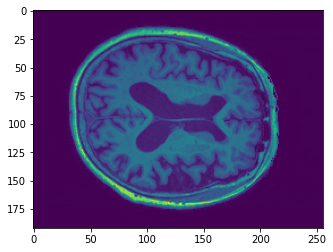

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data.get_fdata()[:,:,150])

We can also access data from the image header. To print and view its contents

In [ ]:
header = data.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  1.  1.  1.  2.5 1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Dec  2 2008'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -93.07869
qoffset_y       : -148.49548
qoffset_z       : -152.57959
srow

In [ ]:
data.affine #The header contains information abour orientation of the image in space
#This can be represented as the affine matrix which can be used to transform images between different spaces 

array([[   1.        ,    0.        ,    0.        ,  -93.07868958],
       [   0.        ,    1.        ,    0.        , -148.4954834 ],
       [   0.        ,    0.        ,    1.        , -152.57958984],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

Plotting data with NiLearn, we'll use this tool to manipulate and visualize neuro-imaging data 

In [ ]:
!pip install -U --user nilearn

#from nilearn.plotting import view_img,plot_glass_brain,plot_anat,plot_epi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys

In [ ]:
for i in sys.path:
  print(i)


/content
/env/python
/usr/lib/python37.zip
/usr/lib/python3.7
/usr/lib/python3.7/lib-dynload
/usr/local/lib/python3.7/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.7/dist-packages/IPython/extensions
/root/.ipython


In [ ]:
!git clone https://github.com/nilearn/nilearn.git

Cloning into 'nilearn'...
remote: Enumerating objects: 56752, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 56752 (delta 69), reused 101 (delta 36), pack-reused 56582
Receiving objects: 100% (56752/56752), 36.34 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (41902/41902), done.


In [ ]:
sys.path.append("/content/nilearn")

In [ ]:
import nilearn

In [ ]:
from nilearn.plotting import view_img, plot_glass_brain, plot_anat,plot_epi

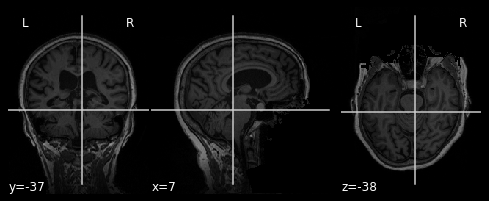

In [ ]:
plot_anat(data)

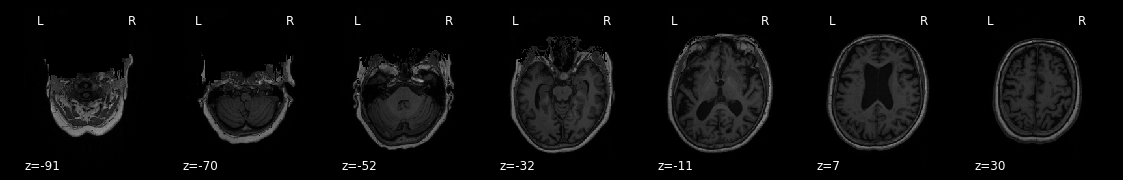

In [ ]:
plot_anat(data,draw_cross=False,display_mode='z')

In [ ]:
plot_anat?

/content/nilearn/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



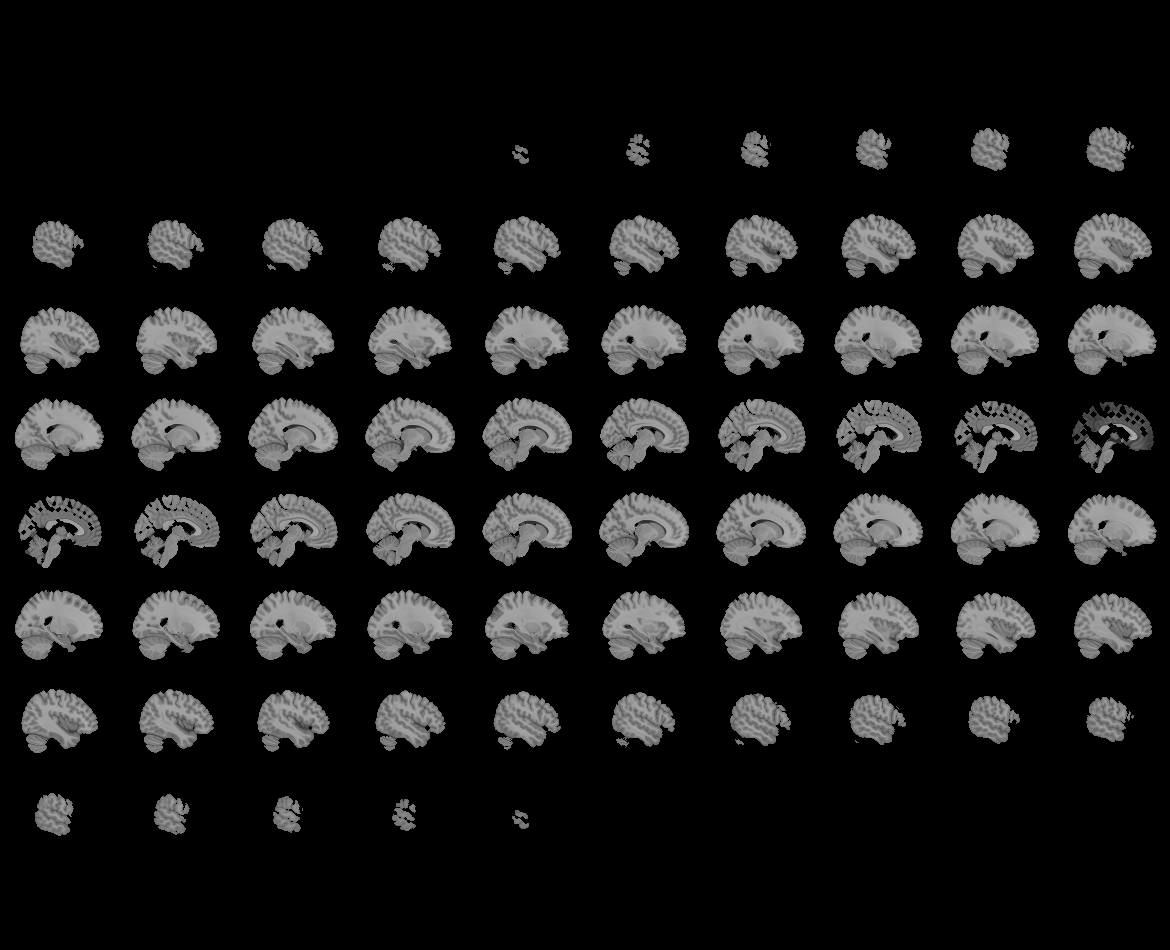
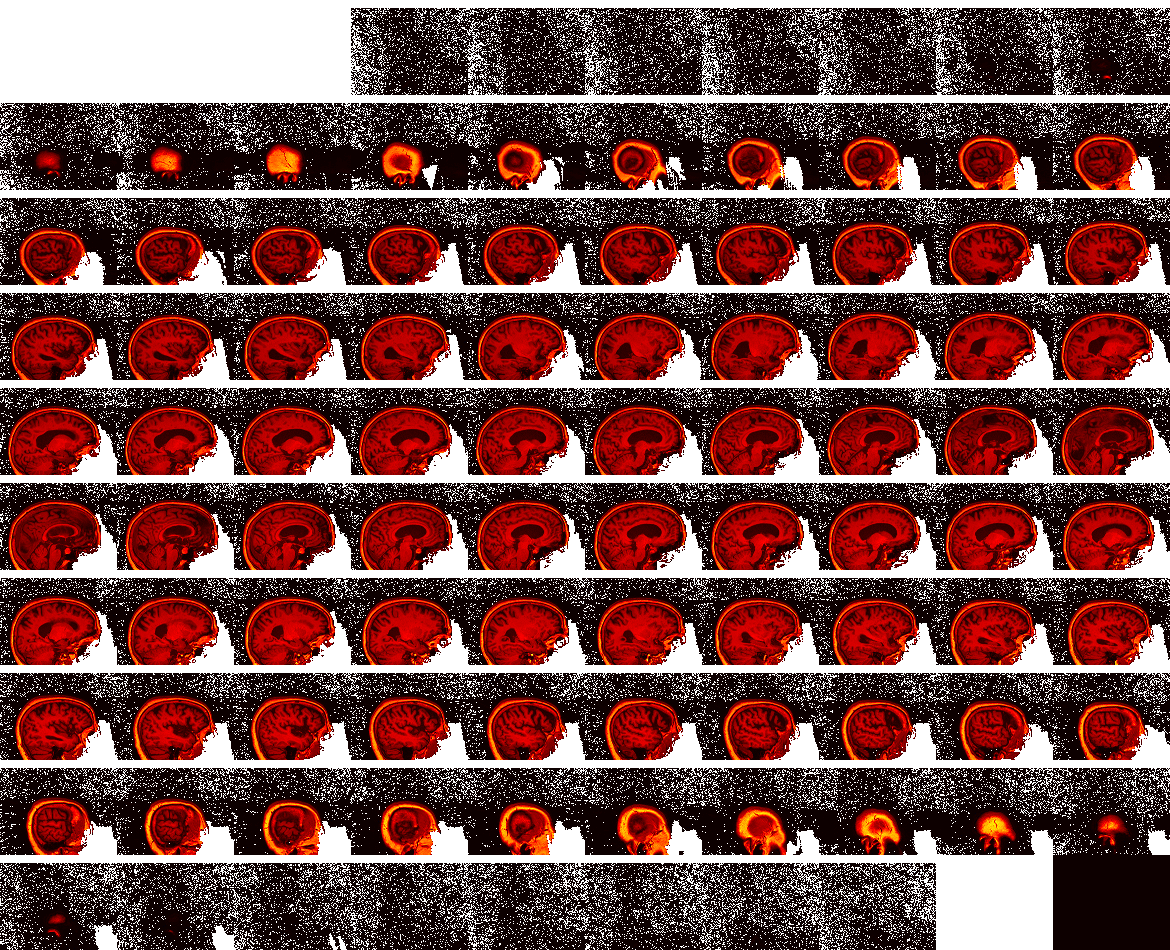

In [ ]:
view_img(data)#This is used for examining images directly in the notebook 

In [ ]:
!pip install nltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.1 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/content/nilearn/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/content/nilearn/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "



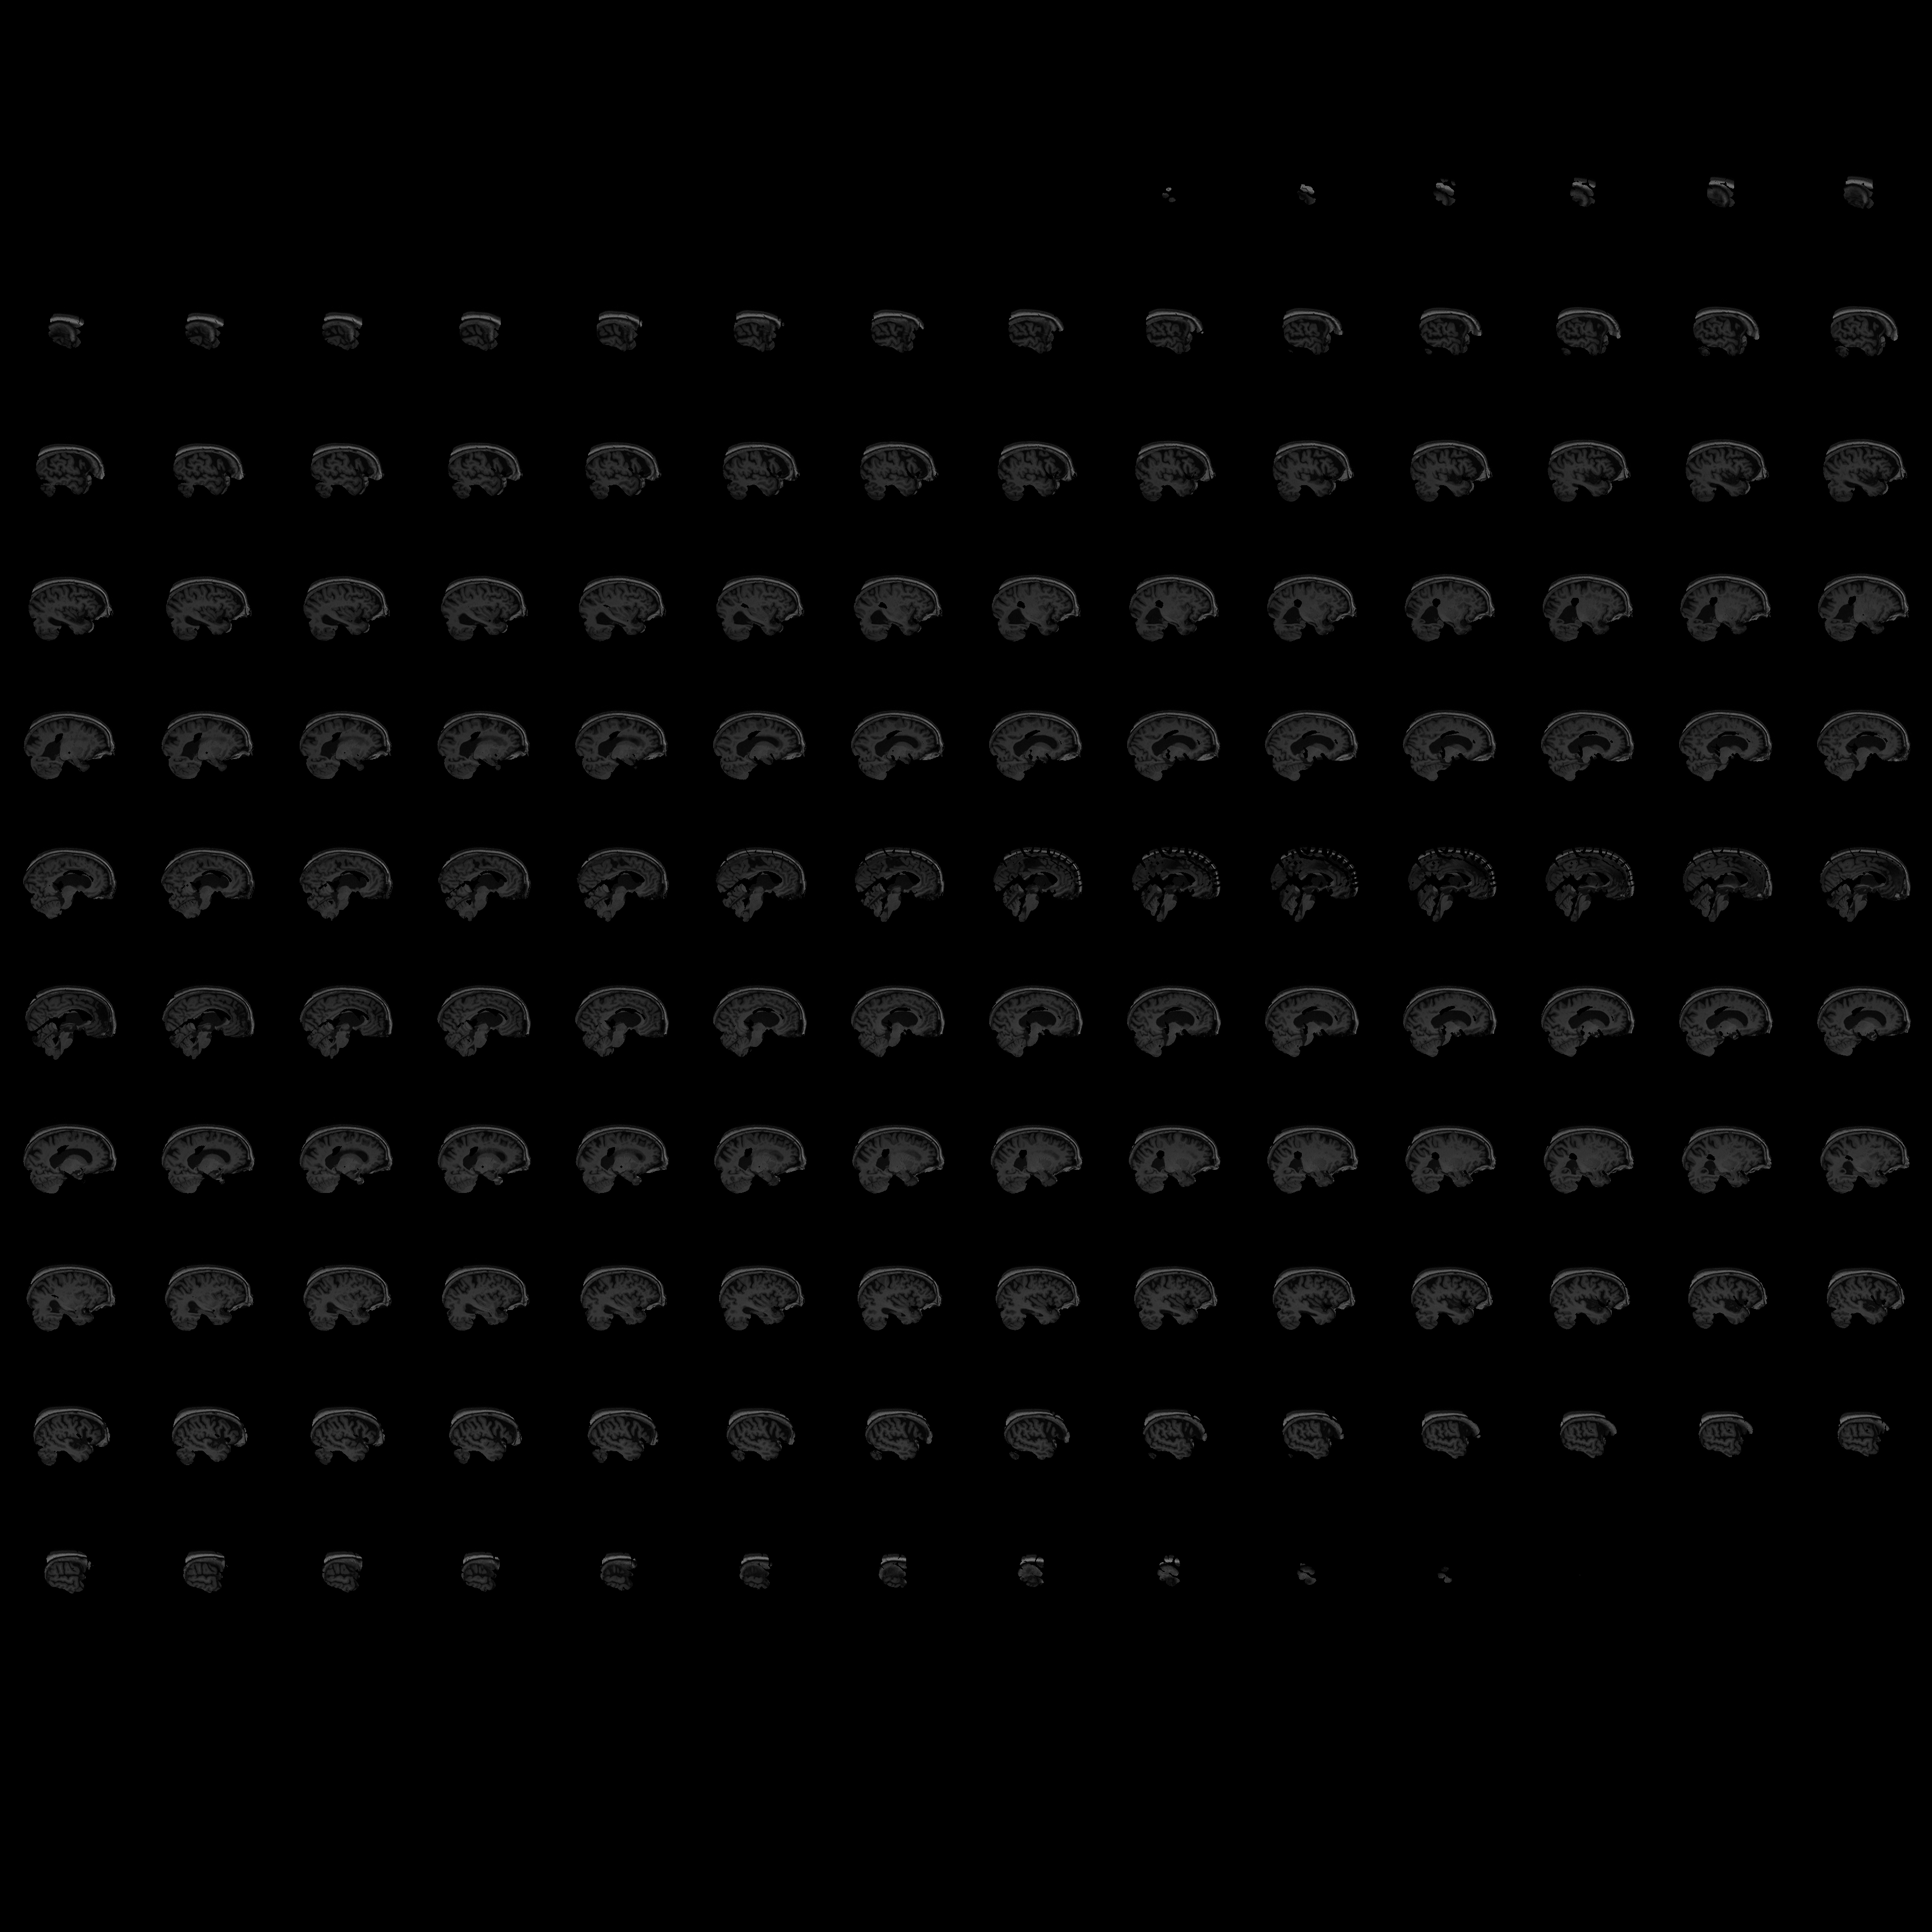
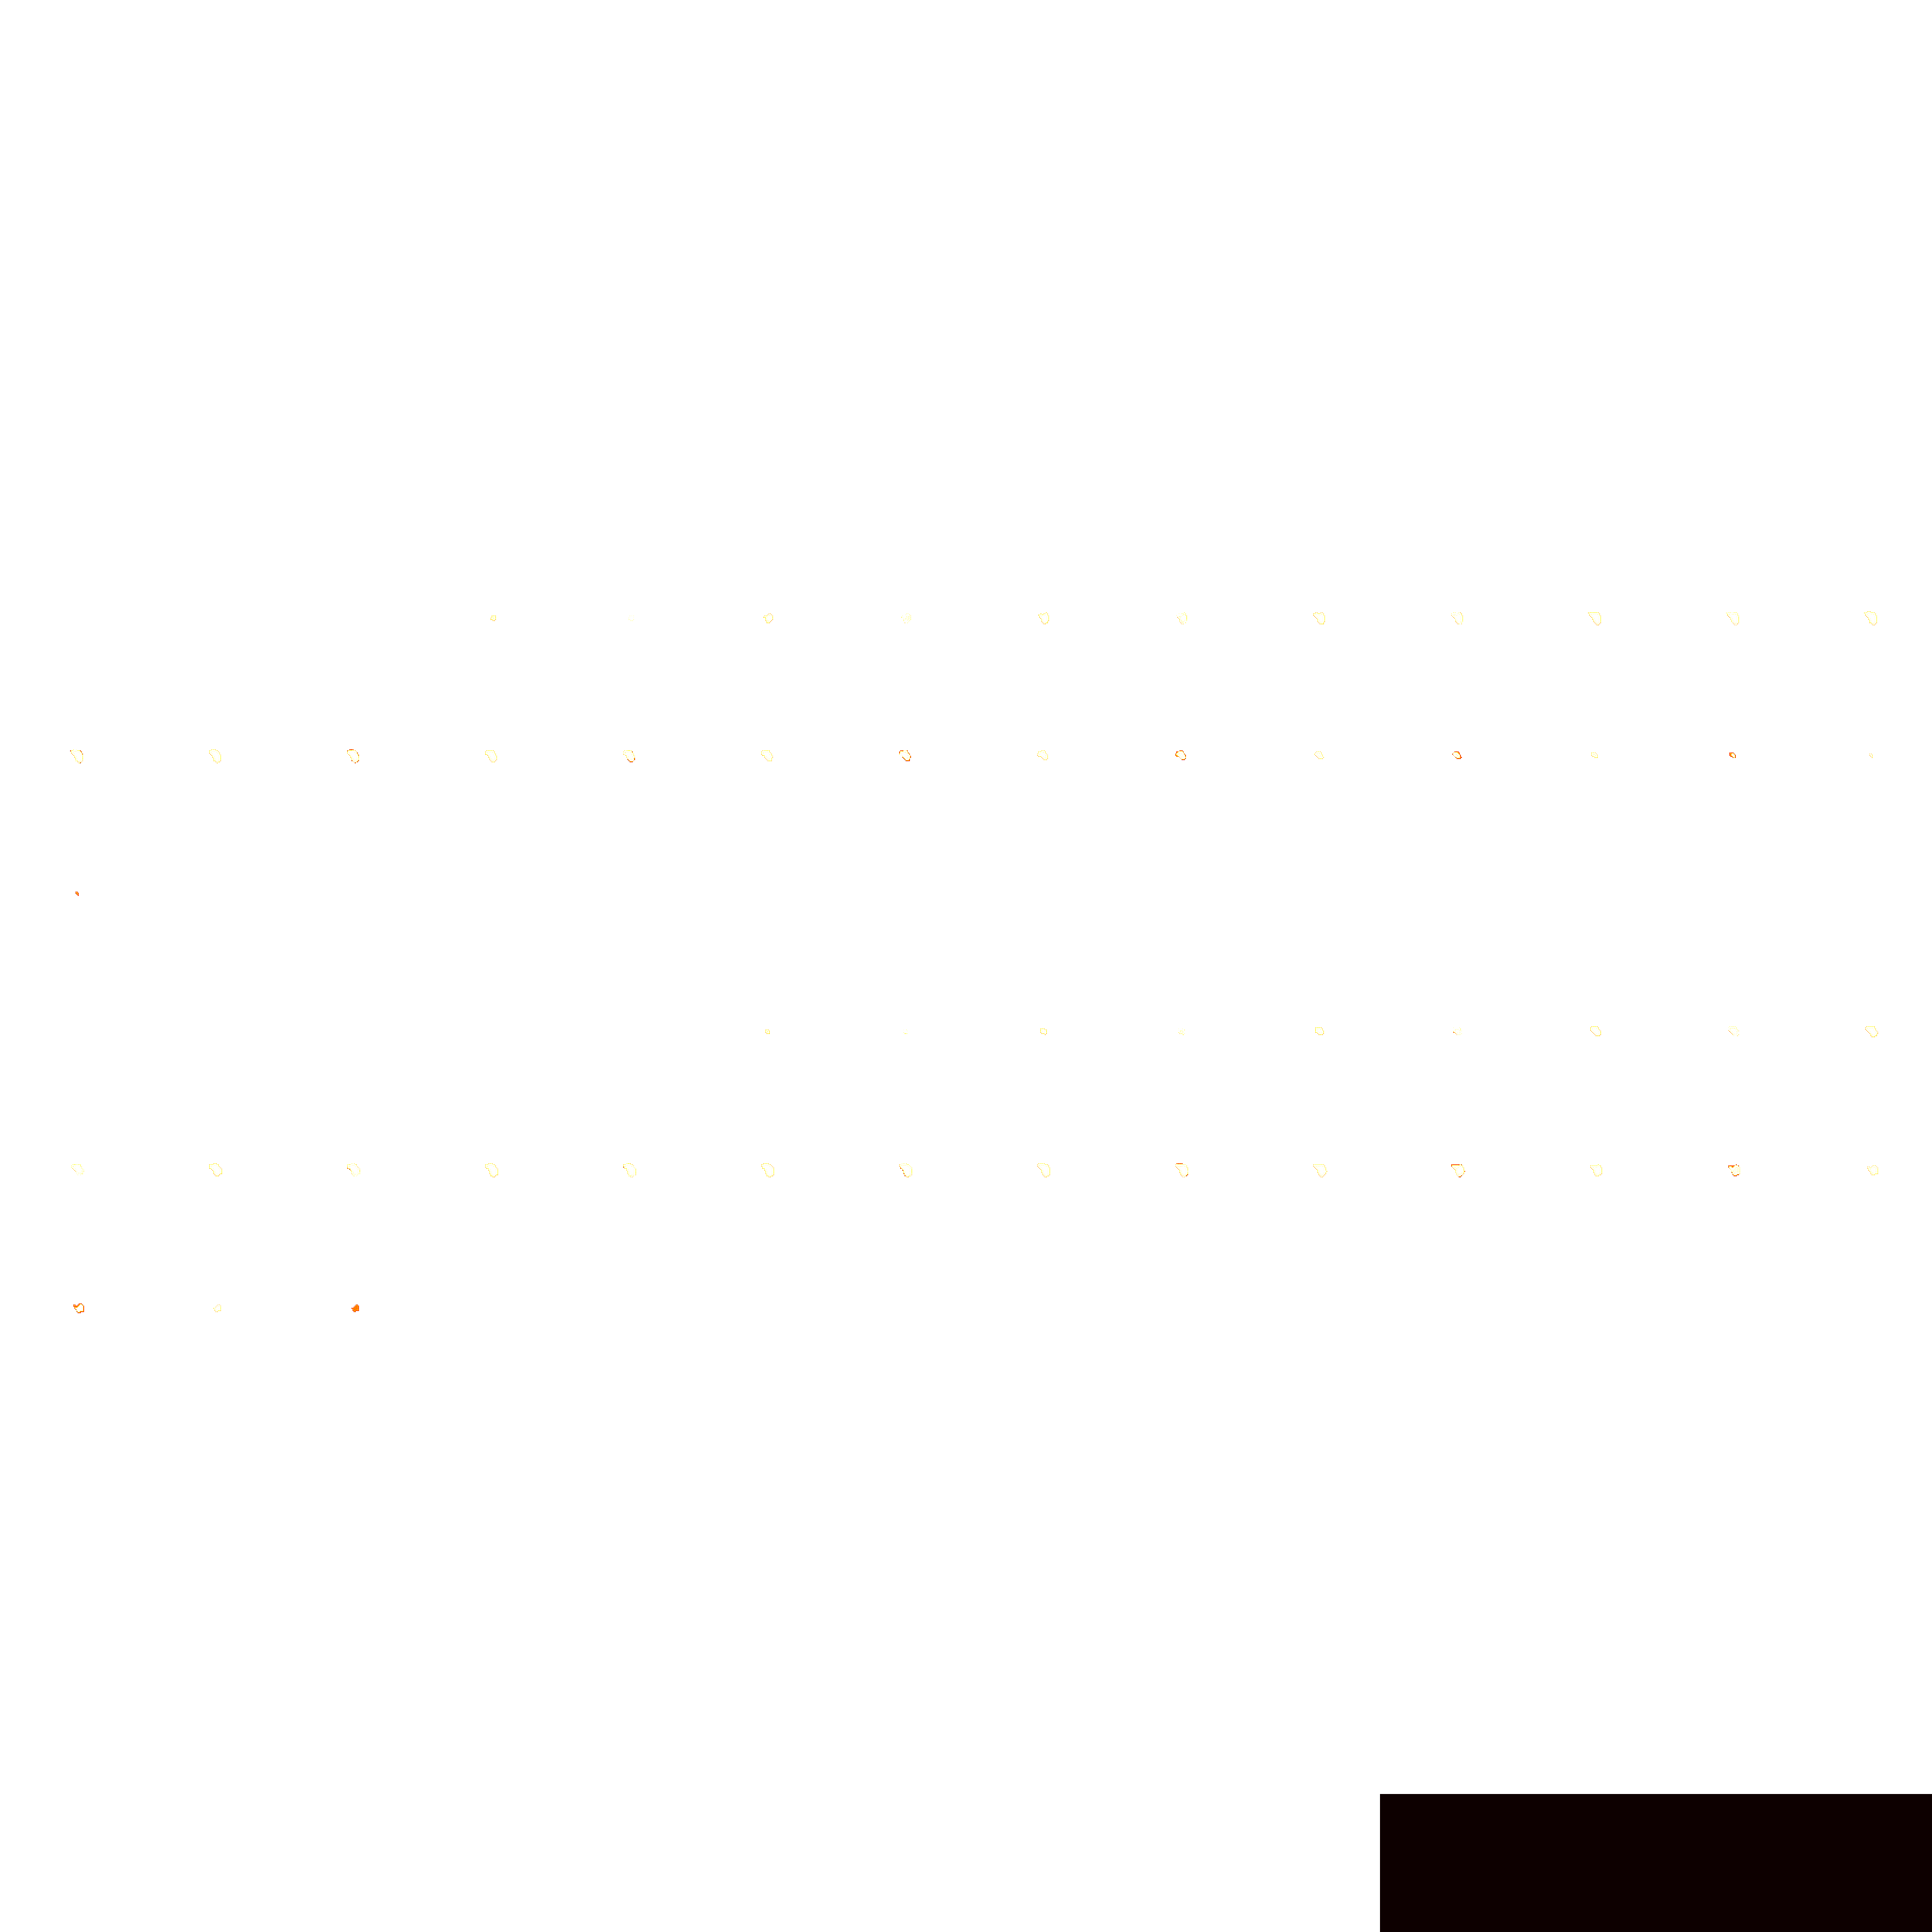

In [ ]:
from nltools.data import Brain_Data
amygdala_mask = Brain_Data('https://neurovault.org/media/images/1290/FSL_BAmyg_thr0.nii.gz').to_nifti()
view_img(amygdala_mask, data)

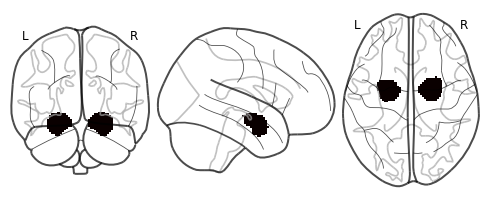

In [ ]:
plot_glass_brain(amygdala_mask)

In [ ]:
from nltools.data import Brain_Data
from nltools.utils import get_anatomical

In [ ]:
anat = Brain_Data(get_anatomical())

In [ ]:
anat

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [ ]:
print(vars(anat))

{'mask': <nibabel.nifti1.Nifti1Image object at 0x7fd3c244ad50>, 'nifti_masker': NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fd3c244ad50>), 'data': array([1875., 2127., 2182., ..., 5170., 5180., 2836.], dtype=float32), 'Y': Empty DataFrame
Columns: []
Index: [], 'X': Empty DataFrame
Columns: []
Index: [], 'file_name': []}


In [ ]:
anat?

In [ ]:
#data = Brain_Data(data_dir,'derivatives', 'fmriprep',sub,func,f"{sub}")

In [ ]:
!pip install cottoncandy nibabel

In [ ]:
#Function to download and install nifti images as nibabel objects 
def download_install(object_name, cci):
  import cottoncandy as cc 
  cci.set_bucket("openneuro.org")
  data_stream = cci.download_stream(object_name)
  #Uncompress the data
  uncompress_data =  cci.utils.GzipInputStream(data_stream.content)

  try:
    from csStringIO import StrinIO
  except ImportError:
    from io import BytesIO as StringIO 

    #Make a file object
    container = StringIO()
    container.write(uncompress_data.read())
    container.seek(0)
    import nibabel as nib

    #Make an image container 
    nifti1_map = nib.Nifti1Image.make_file_map()
    nifti1_map['image'].fileobj = container

    #Make a nifti image 
    nii = nib.Nifti1Image.from_file_map(nifti1_map)
    return nii

In [ ]:
!datalad install https://github.com/OpenNeuroDatasets/ds001907.git

/bin/bash: datalad: command not found


In [ ]:
!pip install nibabel nilearn pybids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datalad